In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import statsmodels.api as sm

In [41]:
df = pd.read_csv("datos.csv")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   OverallCond   1460 non-null   int64
 3   YearBuilt     1460 non-null   int64
 4   YearRemodAdd  1460 non-null   int64
 5   ExterQual     1460 non-null   int64
 6   ExterCond     1460 non-null   int64
 7   BedroomAbvGr  1460 non-null   int64
 8   GarageCars    1460 non-null   int64
 9   PoolArea      1460 non-null   int64
 10  SalePrice     1460 non-null   int64
 11  Artery        1460 non-null   int64
dtypes: int64(12)
memory usage: 137.0 KB


In [43]:
df = df[["SalePrice","YearBuilt", "BedroomAbvGr","LotArea","OverallQual","GarageCars","Artery"]]

In [44]:
df

,SalePrice,YearBuilt,BedroomAbvGr,LotArea,OverallQual,GarageCars,Artery
0,208500,19,3,8450,7,2,0
1,181500,46,3,9600,6,2,0
2,223500,21,3,11250,7,2,0
3,140000,107,3,9550,7,3,0
4,250000,22,4,14260,8,3,0
...,...,...,...,...,...,...,...
1455,175000,23,3,7917,6,2,0
1456,210000,44,3,13175,6,2,0
1457,266500,81,4,9042,7,1,0
1458,142125,72,2,9717,5,1,0


In [45]:
df.describe()

,SalePrice,YearBuilt,BedroomAbvGr,LotArea,OverallQual,GarageCars,Artery
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,50.732192,2.866438,10516.828082,6.099315,1.767123,0.032877
std,79442.502883,30.202904,0.815778,9981.264932,1.382997,0.747315,0.178375
min,34900.000000,12.000000,0.000000,1300.000000,1.000000,0.000000,0.000000
25%,129975.000000,22.000000,2.000000,7553.500000,5.000000,1.000000,0.000000
50%,163000.000000,49.000000,3.000000,9478.500000,6.000000,2.000000,0.000000
75%,214000.000000,68.000000,3.000000,11601.500000,7.000000,2.000000,0.000000
max,755000.000000,150.000000,8.000000,215245.000000,10.000000,4.000000,1.000000


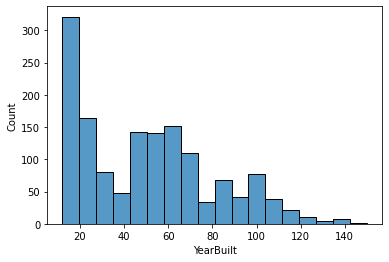

In [46]:
sns.histplot(x=df["YearBuilt"])

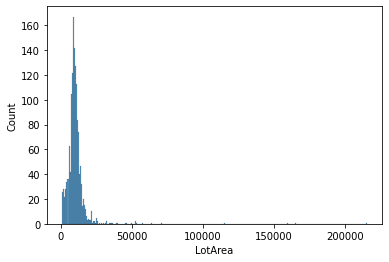

In [47]:
sns.histplot(x=df["LotArea"])

In [48]:
q1=df["LotArea"].quantile(.25)

In [49]:
q3=df["LotArea"].quantile(.75)

In [50]:
IQR = q3-q1

In [51]:
lim_inf = q1-(IQR*1.5)

In [52]:
lim_sup = q3+(IQR*1.5)

In [53]:
df=df[(df["LotArea"]>=lim_inf)&(df["LotArea"]<=lim_sup)]

In [54]:
df

,SalePrice,YearBuilt,BedroomAbvGr,LotArea,OverallQual,GarageCars,Artery
0,208500,19,3,8450,7,2,0
1,181500,46,3,9600,6,2,0
2,223500,21,3,11250,7,2,0
3,140000,107,3,9550,7,3,0
4,250000,22,4,14260,8,3,0
...,...,...,...,...,...,...,...
1455,175000,23,3,7917,6,2,0
1456,210000,44,3,13175,6,2,0
1457,266500,81,4,9042,7,1,0
1458,142125,72,2,9717,5,1,0


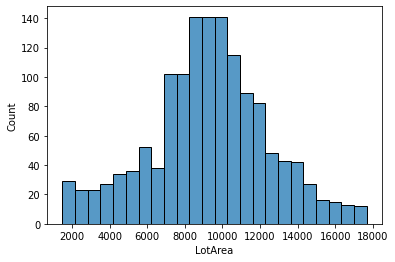

In [55]:
sns.histplot(x=df["LotArea"])

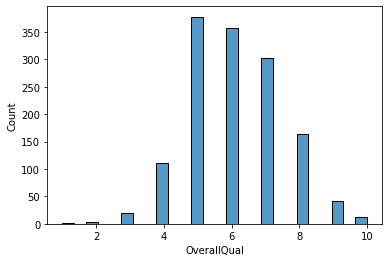

In [56]:
sns.histplot(x=df["OverallQual"])

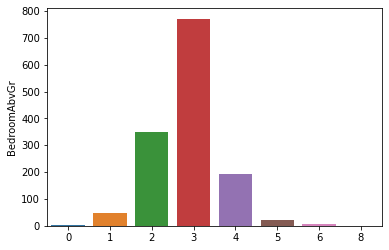

In [57]:
sns.barplot(x=df["BedroomAbvGr"].value_counts().index, y=df["BedroomAbvGr"].value_counts()) #continuo

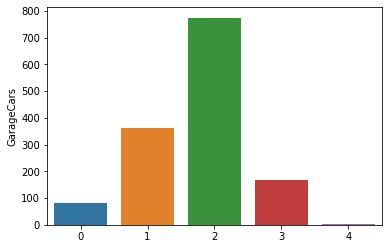

In [58]:
sns.barplot(x=df["GarageCars"].value_counts().index, y=df["GarageCars"].value_counts()) #continuo

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


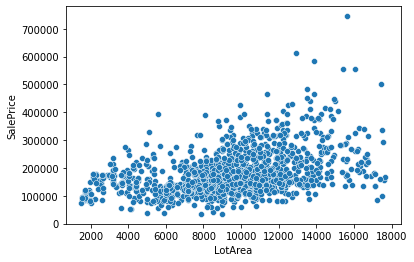

In [60]:
sns.scatterplot(df['LotArea'],df['SalePrice'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


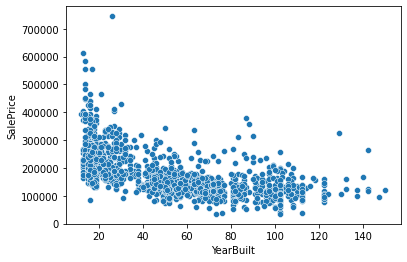

In [61]:
sns.scatterplot(df['YearBuilt'],df['SalePrice'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


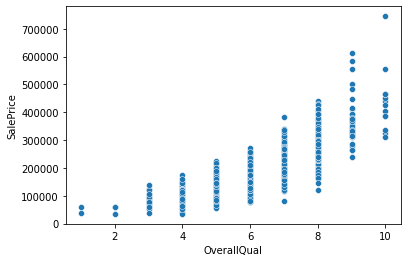

In [62]:
sns.scatterplot(df['OverallQual'],df['SalePrice'])


In [63]:
X = df.copy()
y = X.pop("SalePrice")
X = sm.add_constant(X)
model = sm.OLS(y,X)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     664.9
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:03:05   Log-Likelihood:                -16659.
No. Observations:                1391   AIC:                         3.333e+04
Df Residuals:                    1384   BIC:                         3.337e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.409e+04   7765.970    -12.116      0.000   -1.09e+05   -7.89e+04
YearBuilt     -227.7665     46.379     -4.911      0.000    -318.747    -136.786
BedroomAbvGr  2723.9673   1363.238      1.998      0.046      49.732    5398.203
LotArea          5.1442      0.357     14.421      0.000       4.444       5.844
OverallQual   3.256e+04   1041.013     31.278      0.000    3.05e+04    3.46e+04
GarageCars    1.738e+04   1891.591      9.188      0.000    1.37e+04    2.11e+04
Artery        -1.64e+04   6085.220     -2.696      0.007   -2.83e+04   -4465.904
==============================================================================
Omnibus:                      677.911   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9176.181
Skew:                           1.919   Prob(JB):                         0.00
Kurtosis:                      14.983   Cond. No.                     7.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
reg.params["Artery"]

-16403.155020398546

###En promedio vivir cerca a una arteria disminuye el precio en 16403.15 dólares. (Relación Lin-Lin)

In [65]:
X = df.copy()
y = np.log(X.pop("SalePrice"))
X = sm.add_constant(X)
model = sm.OLS(y,X)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     917.0
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:07:29   Log-Likelihood:                 439.87
No. Observations:                1391   AIC:                            -865.7
Df Residuals:                    1384   BIC:                            -829.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6248      0.036    298.281      0.000      10.555      10.695
YearBuilt       -0.0021      0.000     -9.661      0.000      -0.002      -0.002
BedroomAbvGr     0.0417      0.006      6.663      0.000       0.029       0.054
LotArea       2.418e-05   1.64e-06     14.777      0.000     2.1e-05    2.74e-05
OverallQual      0.1607      0.005     33.659      0.000       0.151       0.170
GarageCars       0.0980      0.009     11.293      0.000       0.081       0.115
Artery          -0.1038      0.028     -3.719      0.000      -0.159      -0.049
==============================================================================
Omnibus:                      129.903   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.312
Skew:                          -0.447   Prob(JB):                     2.41e-91
Kurtosis:                       5.530   Cond. No.                     7.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
reg.params["Artery"]

-0.10379115963409805

###En promedio vivir cerca a una arteria disminuye mi precio en un 10.3% (Relación Log-Lin)